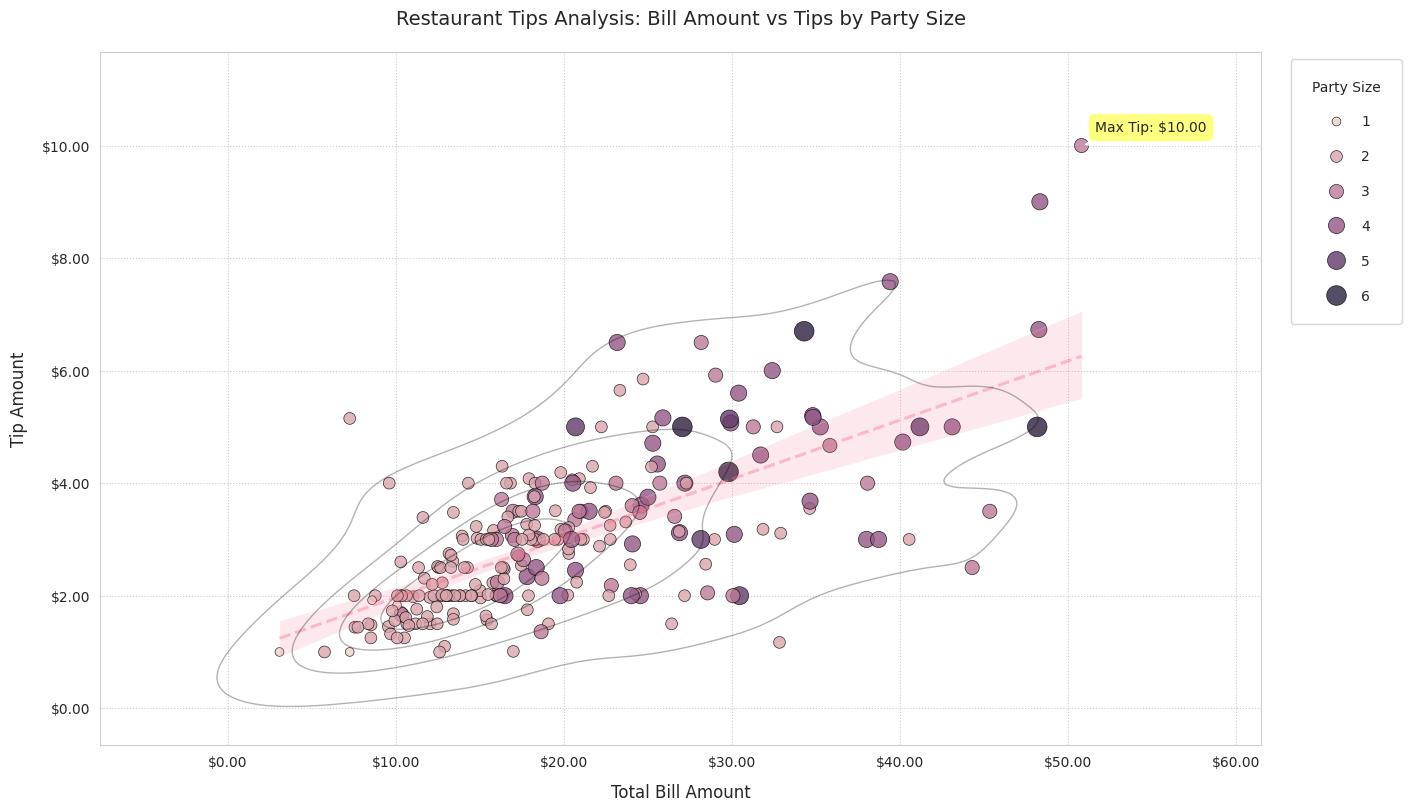

<Figure size 1400x800 with 0 Axes>

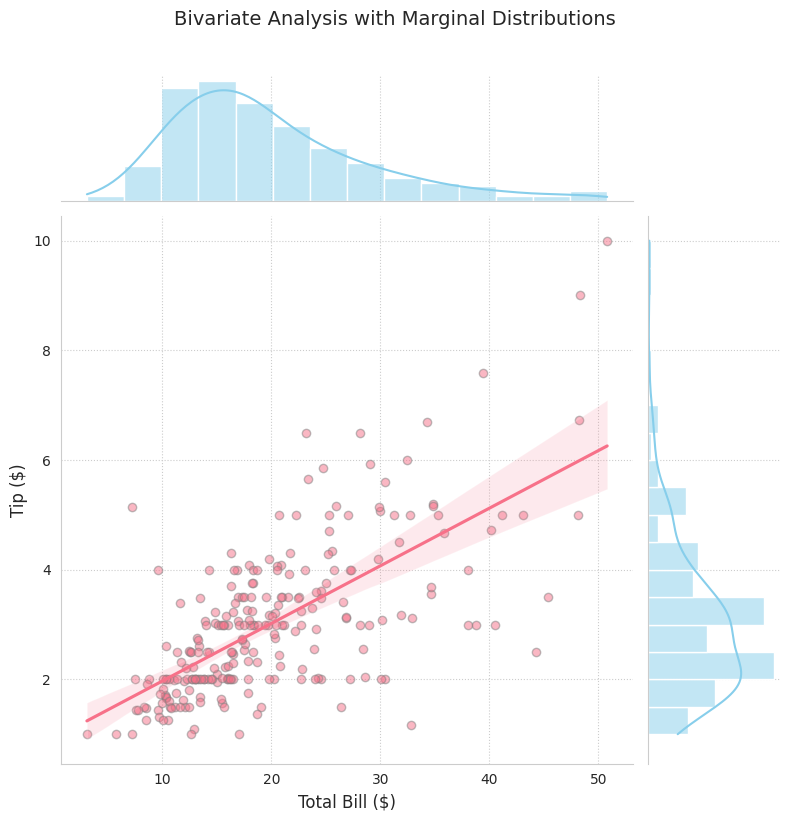

In [1]:
# Advanced Seaborn Plot with DataFrame
# Description: Create a Seaborn plot using a DataFrame that visualizes two features in a single plot. Use tips
# dataset available in Seaborn's sample datasets.
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Load the dataset
tips = sns.load_dataset('tips')

# Set up the figure with constrained layout
plt.figure(figsize=(14, 8), layout='constrained')
sns.set_style("whitegrid", {'grid.linestyle': ':'})
sns.set_palette("husl")

# Create a combination plot
main_ax = sns.scatterplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='size',
    size='size',
    sizes=(40, 200),
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5,
    legend='full'
)

# Add regression lines for each day
sns.regplot(
    data=tips,
    x='total_bill',
    y='tip',
    scatter=False,
    ci=95,
    line_kws={'linestyle': '--', 'alpha': 0.4}
)

# Add kernel density estimate contours
sns.kdeplot(
    data=tips,
    x='total_bill',
    y='tip',
    levels=5,
    color='black',
    alpha=0.3,
    linewidths=1
)

# Customize legend
plt.legend(
    title='Party Size',
    bbox_to_anchor=(1.02, 1),
    borderpad=1.5,
    labelspacing=1.5
)

# Add annotations and reference lines
max_tip = tips['tip'].max()
max_bill = tips.loc[tips['tip'].idxmax(), 'total_bill']
main_ax.annotate(f'Max Tip: ${max_tip:.2f}',
                xy=(max_bill, max_tip),
                xytext=(10, 10),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle='->'))

# Format axes
main_ax.xaxis.set_major_formatter(FormatStrFormatter('$%.2f'))
main_ax.yaxis.set_major_formatter(FormatStrFormatter('$%.2f'))
main_ax.set_xlabel('Total Bill Amount', fontsize=12, labelpad=10)
main_ax.set_ylabel('Tip Amount', fontsize=12, labelpad=10)
main_ax.set_title('Restaurant Tips Analysis: Bill Amount vs Tips by Party Size', 
                 fontsize=14, pad=20)

# Add marginal distributions
plt.figure(figsize=(14, 8))
g = sns.jointplot(
    data=tips,
    x='total_bill',
    y='tip',
    kind='reg',
    height=8,
    ratio=4,
    marginal_kws={'kde': True, 'color': 'skyblue'},
    joint_kws={'scatter_kws': {'alpha': 0.5, 'edgecolor': 'gray'}}
)
g.ax_joint.set_xlabel('Total Bill ($)', fontsize=12)
g.ax_joint.set_ylabel('Tip ($)', fontsize=12)
g.fig.suptitle('Bivariate Analysis with Marginal Distributions', 
              y=1.02, fontsize=14)

plt.tight_layout()
plt.show()